# Cats vs Dogs

In [31]:
#default_exp app
from fastai.vision.all import *
import gradio as gr


In [37]:
#preriquisite for loading model output
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [33]:
#|export
def is_cat(x):  return x.startswith('cat')


Any external functions that you used in your labeling should be used here since the learner is referring to those functions in the model

We now pick a dog iage that we know of from our folder

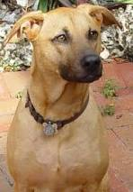

In [34]:
im = 'dog.jpg'
is_dog = PILImage.create(im)
is_dog.thumbnail((192,192))
is_dog

Now, how do we make predictions on whether this is a dog or a cat? Well, instead or retraining our learner, we use load learner. We pass in the file name that we saved , and that returns the learner. this learner is exactly the same as the learner you get when you finish training. 

its like we stored our brain somewhere and just fetched it to use in another model!

In [35]:
#|export
learn = load_learner('model.pkl')

In [36]:
learn.predict(im)

('False', TensorBase(0), TensorBase([1.0000e+00, 5.3847e-13]))

In [38]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [39]:
classify_image(im)

{'Dog': 1.0, 'Cat': 5.3847041842775e-13}

In [40]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

c:\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Python310\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


# Export

In [41]:
from nbdev.export import nb_export

In [42]:
nb_export('app.ipynb', 'app.py')

c:\Python310\lib\site-packages\nbdev\export.py:54: UserWarning: Notebook 'app.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"
